In [1]:
%pylab inline
plt.style.use("default")
import os, sys
import scipy
import pandas as pd
import helpers as h
import utils as u
from glob import glob
from scipy.io import loadmat
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

plt.rcParams['figure.figsize'] = (15, 10) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def clean_unpack(data0):
    """returns clean and zscored signal"""
    resp0, spon0, istim0 = h.unbox(data0)
    resp0 = h.denoise_resp(resp0, spon0)
    resp0_ = resp0
    resp0 = h.dupSignal(resp0, istim0)

    return resp0, resp0_



In [3]:
data_root = "/Users/duuta/ppp/data/stringer/live_data/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]

In [4]:
data = loadmat( os.path.join(data_root, data_files[0]), simplify_cells=True)
resp, resp0 = clean_unpack(data)


# plotting all neurons and coloring by mean is a challenge. 

# add skew and std plots 

In [5]:
x, y, z = data['med'].T

Text(0.5, 1.0, 'X, Y positions on ROIs')

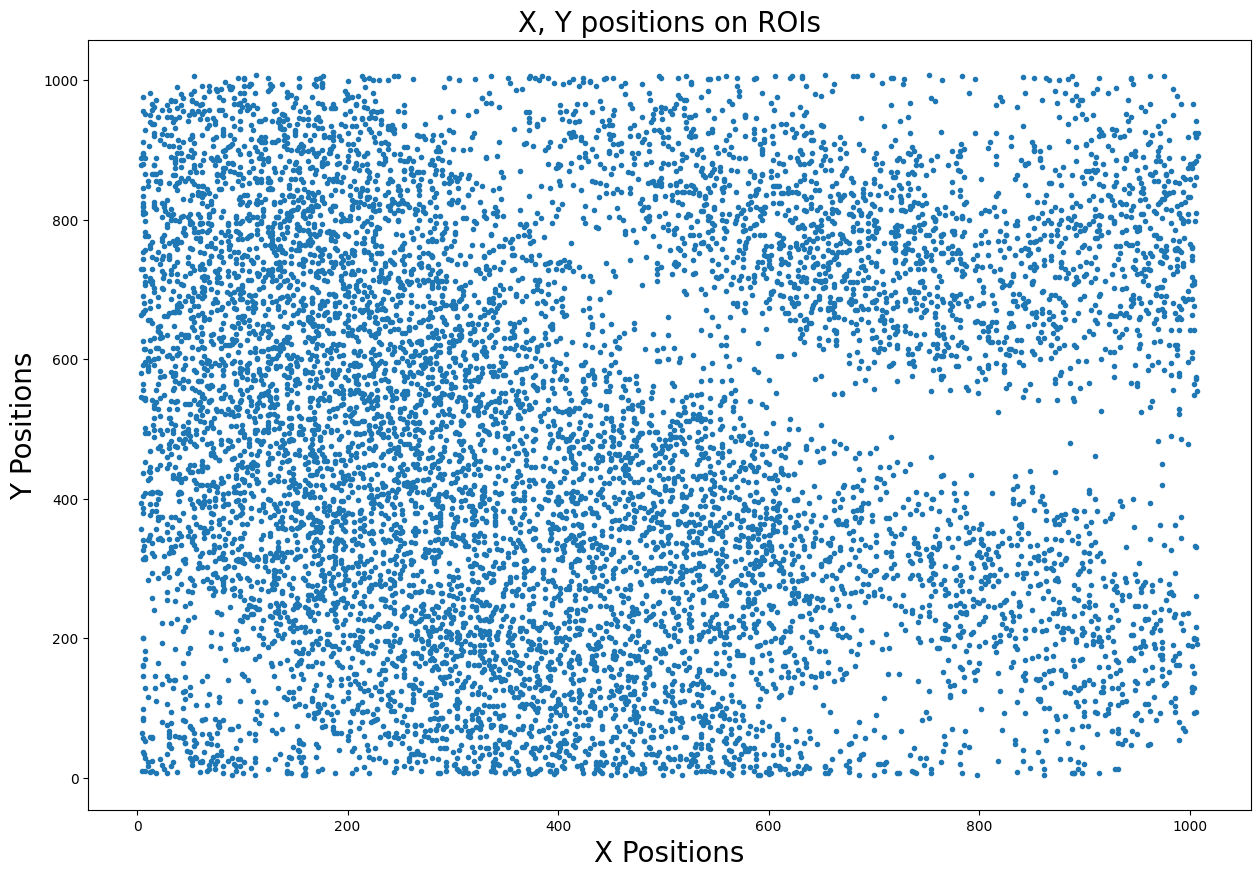

In [8]:
plt.plot(x, y, '.')
plt.xlabel("X Positions", fontsize=20)
plt.ylabel("Y Positions", fontsize=20)
plt.title("X, Y positions on ROIs", fontsize)

In [7]:
zmus = np.mean(resp, axis=1)
zums00 = np.mean(resp0, axis=0)

In [10]:
## add skew and

In [8]:
zskews = skew(resp, axis=1)
zskews00 = skew(resp0, axis=0)

In [9]:
zskews.shape

(2, 10103)

In [10]:
zstds = std(resp, axis=1)
zstds00 = std(resp0, axis=0)

In [12]:
sk = [mean(zskews<z) for z in zskews00]

Text(0.5, 1.0, 'Plot of Skewness values and position of ROIs')

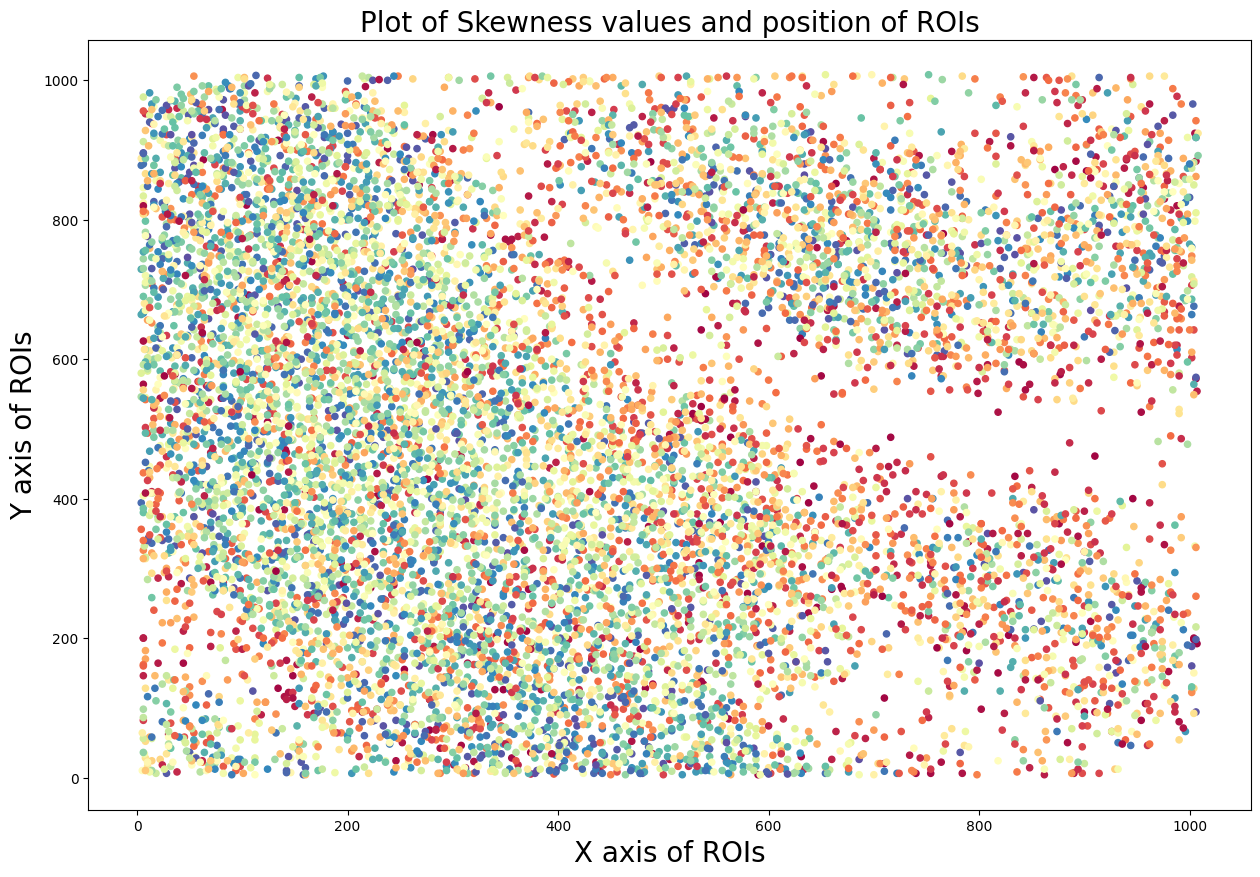

In [13]:
fig1 = plt.figure()
ax = plt.axes()
ax.scatter(x,y, c=sk, cmap="Spectral", s=20)

ax.set_xlabel("X axis of ROIs", fontsize=20)
ax.set_ylabel("Y axis of ROIs", fontsize=20)
ax.set_title("Plot of Skewness values and position of ROIs", fontsize=20)



In [14]:
r0 = [mean(zstds<z) for z in zstds00]

Text(0.5, 1.0, 'Plot of STD and position of ROI')

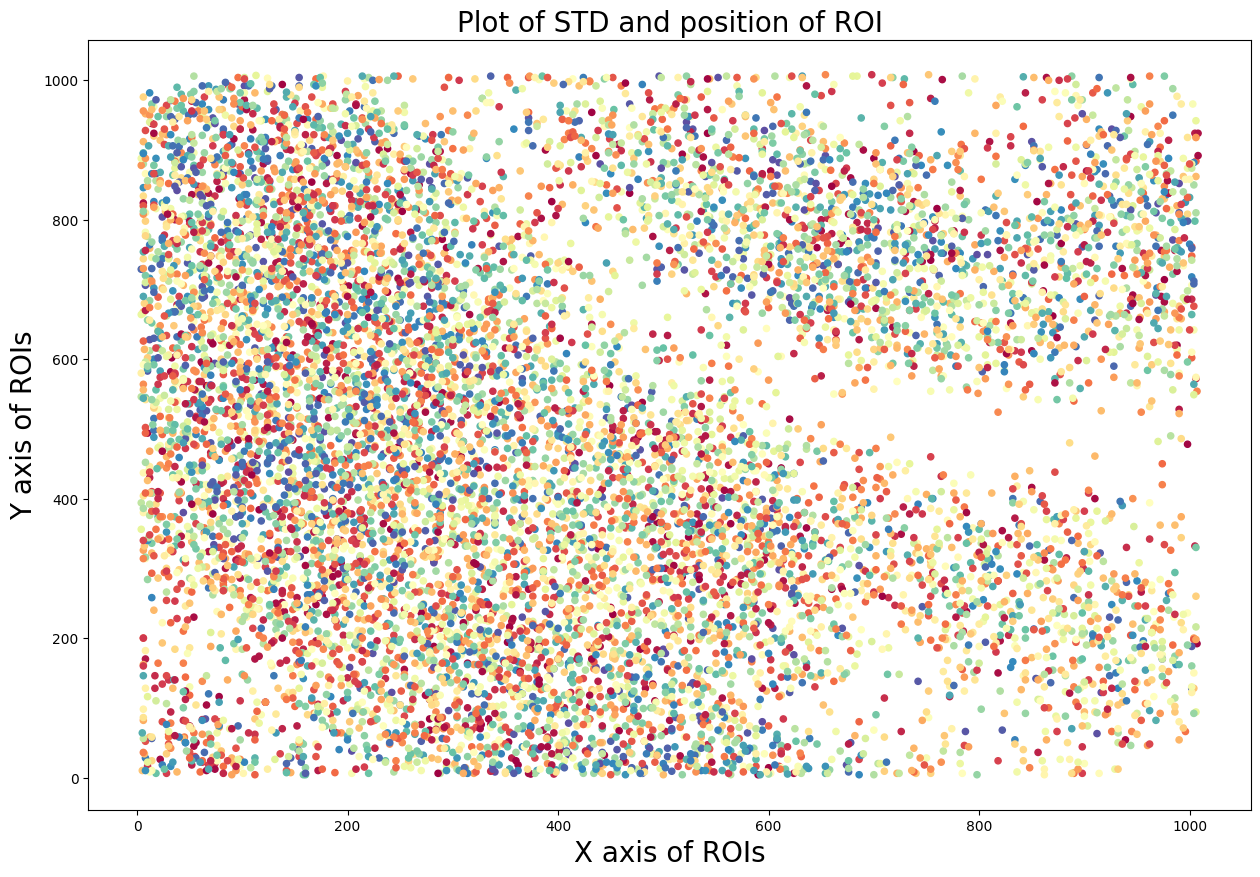

In [192]:
ax = plt.axes()
ax.scatter(x, y, c=r0, cmap='Spectral', s=20)
ax.set_xlabel("X axis of ROIs", fontsize=20)
ax.set_ylabel("Y axis of ROIs", fontsize=20)
ax.set_title("Plot of STD and position of ROI", fontsize=20)

In [32]:
# regress ROIs metrics against coordinates.

In [35]:
abib_regress = LinearRegression()

In [15]:
zmus0  = zums00.reshape(-1, 1)


# REGRESS (features on X, Y, Z) 

In [16]:
X0 = np.vstack((x, y))

In [17]:
X0 = X0.reshape(-1, 2)

In [19]:
zskews0 = zskews.reshape(-1, 1)
zstds0 = zstds.reshape(-1, 1)

In [20]:
gauss = sm.GLM(zums00, X0, family=sm.families.Gaussian())

In [ ]:
gauss_fit = gauss.fit()

In [22]:
gauss00 = sm.GLM(zskews00, X0, family=sm.families.Gaussian())
gauss00_fit = gauss00.fit()

In [23]:
gauss01 = sm.GLM(zstds00, X0, family=sm.families.Gaussian())
gauss01_fit = gauss01.fit()

In [52]:
np.corrcoef((X0 @ gauss00_fit.params).flatten(),zskews00.flatten())

array([[1.       , 0.0201669],
       [0.0201669, 1.       ]])

In [56]:
np.corrcoef((X0 @ gauss_fit.params).flatten(),zums00.flatten())

array([[1.        , 0.01740442],
       [0.01740442, 1.        ]])

In [135]:
np.corrcoef((X0 @ gauss01_fit.params).flatten(),zstds00.flatten())

array([[1.        , 0.00679486],
       [0.00679486, 1.        ]])

In [139]:
# Caputering nonliner effects 

In [24]:
X02 = np.vstack((x, y, z, x**2, y**2, z**2, x*y, x*z, y*z)).reshape(-1, 9)

In [147]:
# Check Skewness

In [25]:
gauss_skew = sm.GLM(zskews00, X02, family=sm.families.Gaussian())

In [27]:
gauss_skew_fit = gauss_skew.fit()

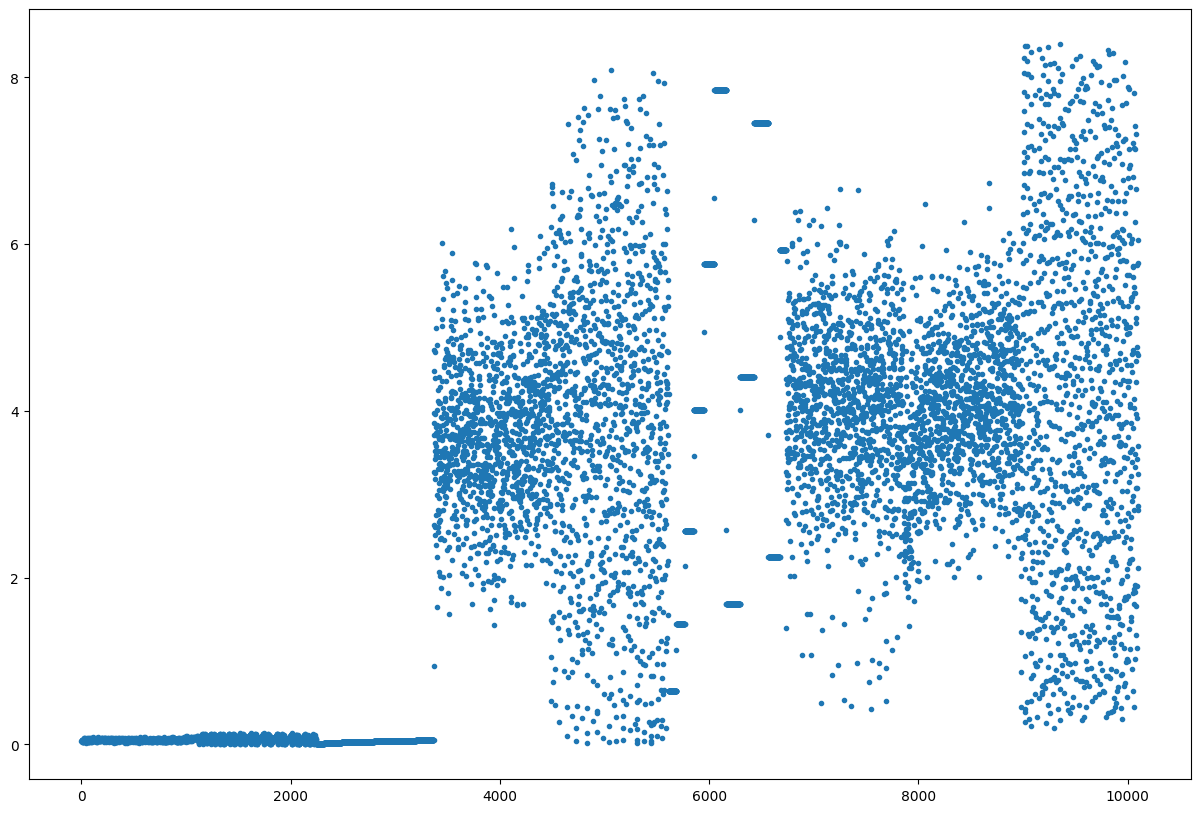

In [31]:
plt.plot(X02 @ gauss_skew_fit.params, '.')

In [36]:
z0 = np.asarray((zskews00, zskews00))

In [41]:
z00 = np.asarray([[b]*len(zskews00) for b in zskews00])

In [42]:
z00.shape

(10103, 10103)

In [52]:
x00 = X02 @gauss_skew_fit.params


In [53]:
x00.shape

(10103,)

In [46]:
X00 , Y00 = meshgrid(x, y)

In [63]:
zps =  gauss_skew_fit.params @ np.vstack((X00, Y00)) 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20206 is different from 9)

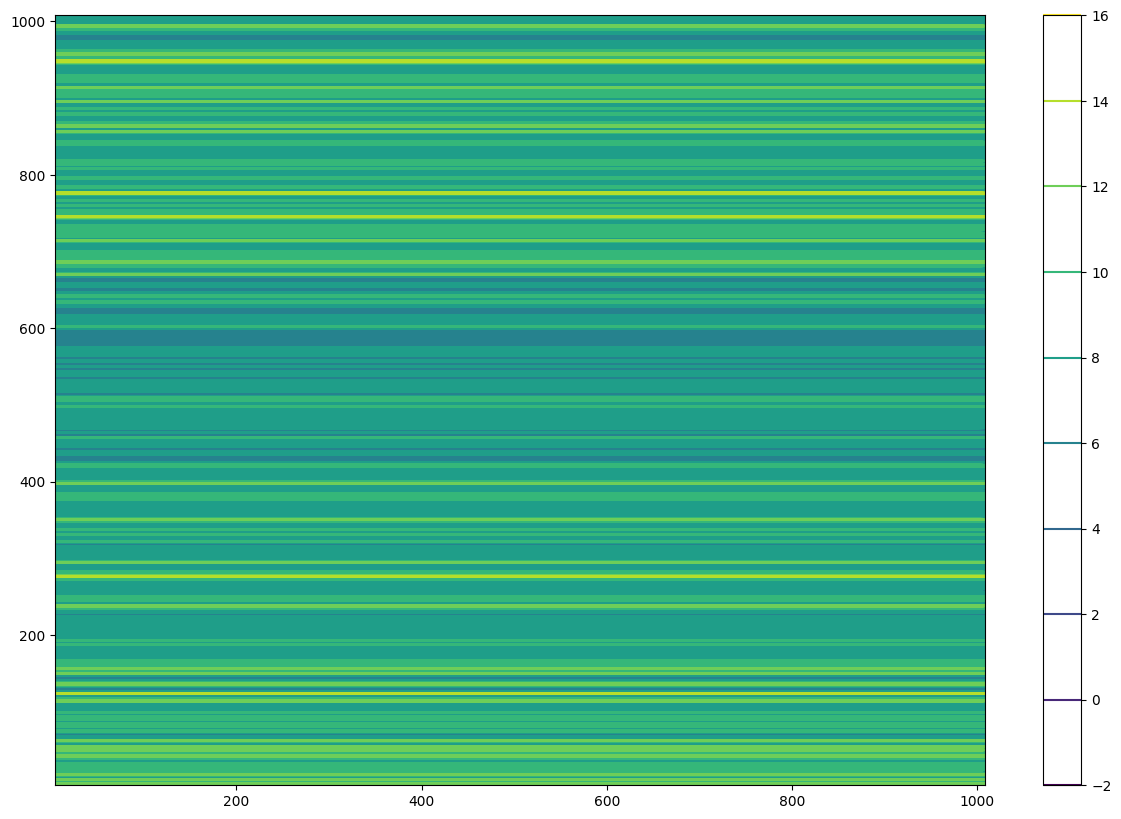

In [47]:
contour(X00, Y00, z00, levels=10)
colorbar()

In [55]:
N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

In [57]:
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
zk = Z1 + 50 * Z2

In [59]:
a

(100, 100)